# Python Teil

## Aufgabe 1 (5 Punkte)

Wir betrachten die Funktion $f(x) = x^3 - 2$ und ihre Ableitung $f'(x)$ sowie die Stellen $x = -1, -0.75, -0.5, -0,25, ..., 3$.

1. Erstellen Sie mittels formatted printing eine Wertetabelle der Funktion $f$ an den angegebenen Stellen im folgenden Format

    |   x   |  f(x) |
    |-------|-------|
    | -1.00 | -3.00 |
    | -0.75 | -2.42 |
    | etc.  | etc.  |

2. Plotten Sie $f$ und $f'$ an diesen Stellen in grün bzw. rot, mit Achsenbeschriftung und Legende.

### Lösung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**3 - 2

def fp(x):
    return 3*x**2

x_values = np.arange(-1, 3.25, step=0.25)

print("  x   | f(x)")
print("-------------")
for x in x_values:
    print(f"{x:5.2f} | {f(x):5.2f}")

  x   | f(x)
-------------
-1.00 | -3.00
-0.75 | -2.42
-0.50 | -2.12
-0.25 | -2.02
 0.00 | -2.00
 0.25 | -1.98
 0.50 | -1.88
 0.75 | -1.58
 1.00 | -1.00
 1.25 | -0.05
 1.50 |  1.38
 1.75 |  3.36
 2.00 |  6.00
 2.25 |  9.39
 2.50 | 13.62
 2.75 | 18.80
 3.00 | 25.00


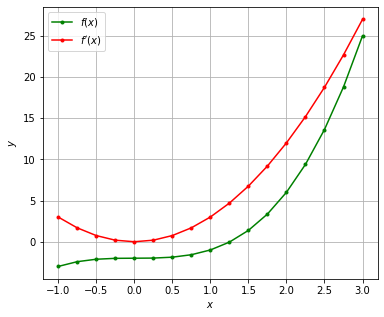

In [3]:
plt.figure(figsize=(6,5))
plt.plot(x_values, f (x_values), '.-g', label='$f(x)$')
plt.plot(x_values, fp(x_values), '.-r', label="$f'(x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

## Aufgabe 2 (2 Punkte)

Gegeben ist die Hessematrix 

$$H = \begin{pmatrix}
 4 & -1 & 0 \\
-1 &  2 & 1 \\
 0 &  1 & 6
\end{pmatrix}.$$

Verwenden Sie den Befehl `eig` aus dem Modul `numpy.linalg`, um die Eigenwerte dieser Hessematrix zu bestimmen.

### Lösung

In [4]:
import numpy as np

In [5]:
H = np.array([[ 4, -1, 0],
              [-1,  2, 1],
              [ 0,  1, 6]])

L, V = np.linalg.eig(H)
for l in L:
    print(f"{l:.3f} ist ein Eigenwert.")

1.398 ist ein Eigenwert.
4.340 ist ein Eigenwert.
6.262 ist ein Eigenwert.


## Aufgabe 3 (4 Punkte)

1. Importieren Die das NetworkX-Paket mit Präfix `nx`.
2. Erstellen Sie mit dessen Hilfe folgenden Graphen und plotten Sie in inkl. Knoten- und Kanten-Labels:

![Graph_1.png](Graph_1.png)

3. Bestimmen Sie vom Startknoten S aus die kürzesten Wege und deren Distanzen zu allen anderen Knoten.

*Hinweise:* Verwenden Sie folgende Befehle und Methoden: `nx.Graph`, `.add_edge`, `nx.draw`, `.get_edge_attributes`, `nx.draw_networkx_edge_labels`, `nx.shortest_path`, `nx.shortest_path_length`.

### Lösung

In [6]:
import networkx as nx

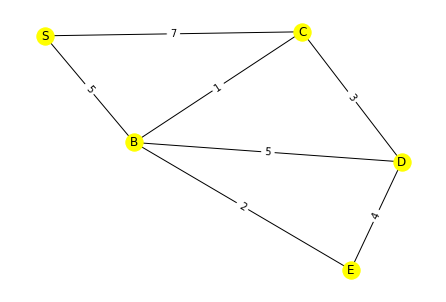

In [7]:
G = nx.Graph()

G.add_edge('S', 'B', weight= 5)
G.add_edge('S', 'C', weight= 7)
G.add_edge('C', 'D', weight= 3)
G.add_edge('C', 'B', weight= 1)
G.add_edge('D', 'E', weight= 4)
G.add_edge('B', 'D', weight= 5)
G.add_edge('B', 'E', weight= 2)

pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos=pos, with_labels=True, node_color='yellow')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels);

import matplotlib.pyplot as plt
plt.savefig("Graph.png")
plt.savefig("Graph.pdf")

In [8]:
nx.shortest_path(G, source='S', target=None, weight='weight')

{'S': ['S'],
 'B': ['S', 'B'],
 'C': ['S', 'B', 'C'],
 'D': ['S', 'B', 'C', 'D'],
 'E': ['S', 'B', 'E']}

In [9]:
nx.shortest_path_length(G, source='S', target=None, weight='weight')

{'S': 0, 'B': 5, 'C': 6, 'E': 7, 'D': 9}